# Exploratory Data Analysis 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

from scipy import stats

### 1a. Import Cleaned Khan Data set 

In [2]:
khan_data = pd.read_csv('./data/khan_data_cleaned.csv')

### 1b. Exploring the data

In [3]:
khan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31481 entries, 0 to 31480
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            31481 non-null  int64  
 1   timestamp             31481 non-null  object 
 2   user_id               31481 non-null  int64  
 3   session_id            31481 non-null  int64  
 4   country               31481 non-null  object 
 5   language              31481 non-null  object 
 6   user_registered_flag  31481 non-null  bool   
 7   device_type           31481 non-null  object 
 8   KA_app_flag           31481 non-null  bool   
 9   OS                    31481 non-null  object 
 10  URI                   26149 non-null  object 
 11  conversion            31481 non-null  object 
 12  day                   31481 non-null  object 
 13  date                  31481 non-null  object 
 14  time_sec              31481 non-null  object 
 15  time_min           

In [4]:
khan_data.head()

,Unnamed: 0,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff,diff_h,returned_user
0,0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00,False,NaN,NaN,0
1,1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00,True,0 days 00:00:00.747921,0.0,0
2,2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00,True,0 days 00:00:08.877230,0.0,0
3,3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:39.681943,18:06:39.681943,18:07:00,True,0 days 00:00:55.648547,0.0,0
4,4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:55.040427,18:06:55.040427,18:07:00,True,0 days 00:00:15.358484,0.0,0


In [5]:
khan_data = khan_data.drop(['Unnamed: 0'], axis =1)

In [6]:
# Verify the dimensions of the data set
print("There are:", khan_data.shape[0], 'rows.')
print("There are:", khan_data.shape[1], 'columns.')

There are: 31481 rows.
There are: 19 columns.


### Explore the dependant variable

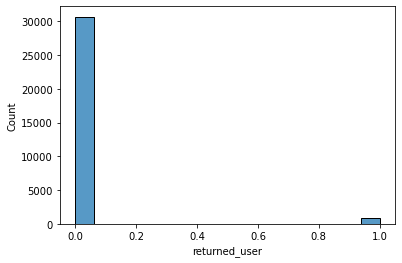

In [7]:
# Exploring the dependant variable of returned_user 
sns.histplot(data=khan_data, x="returned_user")
plt.show()

In [8]:
khan_data.returned_user.value_counts()

0    30677
1      804
Name: returned_user, dtype: int64

We have 804 returned users and 30,677 non-returned users in the data set

In [9]:
khan_data.returned_user.isna().value_counts()

False    31481
Name: returned_user, dtype: int64

Confirmed that there are no NA values in the returned_user column

In [10]:
khan_data.corr()

,user_id,session_id,user_registered_flag,KA_app_flag,match,diff_h,returned_user
user_id,1.000000,-0.015130,0.013555,0.025828,0.005262,0.004516,0.007779
session_id,-0.015130,1.000000,-0.004922,0.019978,-0.001281,-0.002689,-0.005398
user_registered_flag,0.013555,-0.004922,1.000000,-0.192436,0.219644,-0.022595,-0.019632
KA_app_flag,0.025828,0.019978,-0.192436,1.000000,-0.049478,0.034348,0.039564
match,0.005262,-0.001281,0.219644,-0.049478,1.000000,NaN,0.038244
diff_h,0.004516,-0.002689,-0.022595,0.034348,NaN,1.000000,0.927826
returned_user,0.007779,-0.005398,-0.019632,0.039564,0.038244,0.927826,1.000000


match and diff_h were used to determined a returned_user, thus, not an important feature for EDA

In [11]:
# Droping match, diff, and diff_h columns
#khan_data = khan_data.drop(['match','diff','diff_h'], axis=1)

In [12]:
khan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31481 entries, 0 to 31480
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             31481 non-null  object 
 1   user_id               31481 non-null  int64  
 2   session_id            31481 non-null  int64  
 3   country               31481 non-null  object 
 4   language              31481 non-null  object 
 5   user_registered_flag  31481 non-null  bool   
 6   device_type           31481 non-null  object 
 7   KA_app_flag           31481 non-null  bool   
 8   OS                    31481 non-null  object 
 9   URI                   26149 non-null  object 
 10  conversion            31481 non-null  object 
 11  day                   31481 non-null  object 
 12  date                  31481 non-null  object 
 13  time_sec              31481 non-null  object 
 14  time_min              31481 non-null  object 
 15  match              

In [13]:
khan_data.head()

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff,diff_h,returned_user
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00,False,NaN,NaN,0
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00,True,0 days 00:00:00.747921,0.0,0
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00,True,0 days 00:00:08.877230,0.0,0
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:39.681943,18:06:39.681943,18:07:00,True,0 days 00:00:55.648547,0.0,0
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:55.040427,18:06:55.040427,18:07:00,True,0 days 00:00:15.358484,0.0,0


In [14]:
# Changing booleans to int64 with 0 = False , 1 = True
print("Initial values", khan_data.KA_app_flag)

Initial values 0        False
1        False
2        False
3        False
4        False
         ...  
31476    False
31477    False
31478    False
31479    False
31480    False
Name: KA_app_flag, Length: 31481, dtype: bool


In [15]:
khan_data.KA_app_flag = np.multiply(khan_data.KA_app_flag, 1)

In [16]:
khan_data.user_registered_flag = np.multiply(khan_data.user_registered_flag, 1)

In [17]:
khan_data.head()

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,day,date,time_sec,time_min,match,diff,diff_h,returned_user
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,1,desktop,0,Windows,NaN,login,2016-02-18,2016-02-18 18:05:34.408245,18:05:34.408245,18:06:00,False,NaN,NaN,0
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,1,desktop,0,Windows,NaN,homepage_view,2016-02-18,2016-02-18 18:05:35.156166,18:05:35.156166,18:06:00,True,0 days 00:00:00.747921,0.0,0
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,1,desktop,0,Windows,"""/welcome""",pageview,2016-02-18,2016-02-18 18:05:44.033396,18:05:44.033396,18:06:00,True,0 days 00:00:08.877230,0.0,0
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,1,desktop,0,Windows,"""/math/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:39.681943,18:06:39.681943,18:07:00,True,0 days 00:00:55.648547,0.0,0
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,1,desktop,0,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,2016-02-18 18:06:55.040427,18:06:55.040427,18:07:00,True,0 days 00:00:15.358484,0.0,0


In [18]:
khan_data.KA_app_flag.value_counts()

0    30885
1      596
Name: KA_app_flag, dtype: int64

### Extracting necessary columns based on perosnal inference

In [19]:
khan_data = khan_data[['user_id', 'session_id', 'country', 'language', 'device_type', 'user_registered_flag', 'KA_app_flag','OS','returned_user']]

In [20]:
khan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31481 entries, 0 to 31480
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               31481 non-null  int64 
 1   session_id            31481 non-null  int64 
 2   country               31481 non-null  object
 3   language              31481 non-null  object
 4   device_type           31481 non-null  object
 5   user_registered_flag  31481 non-null  int64 
 6   KA_app_flag           31481 non-null  int64 
 7   OS                    31481 non-null  object
 8   returned_user         31481 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.2+ MB


### 2.Cleaning, Transforming & Visualizing

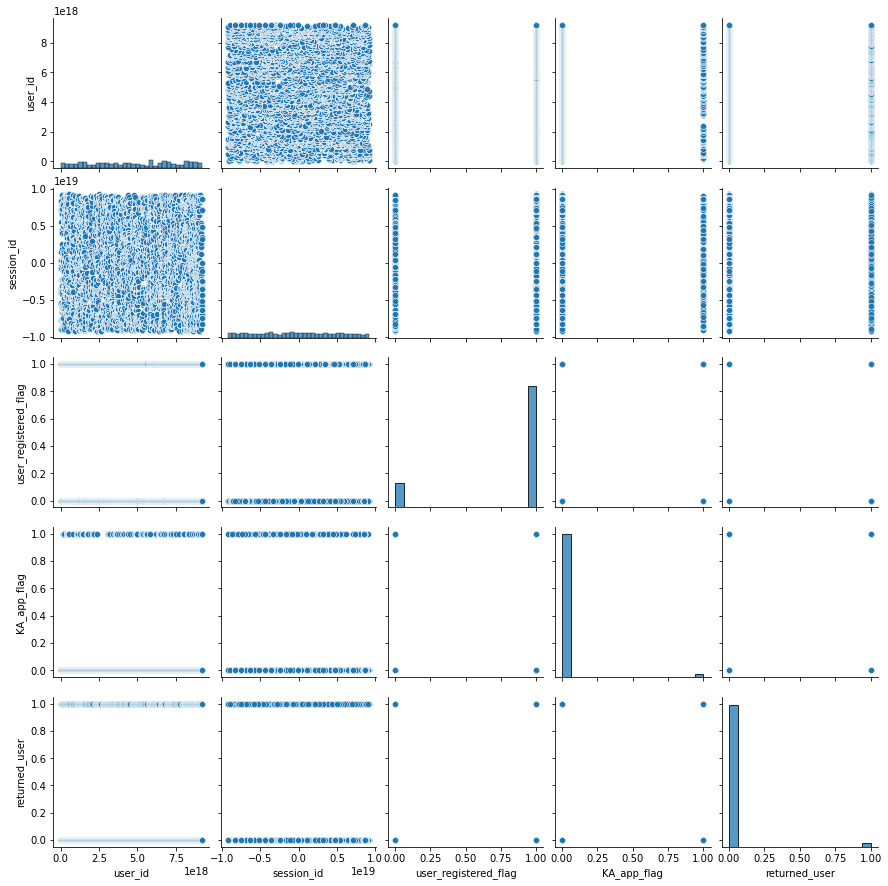

In [21]:
sns.pairplot(khan_data)

<AxesSubplot:>

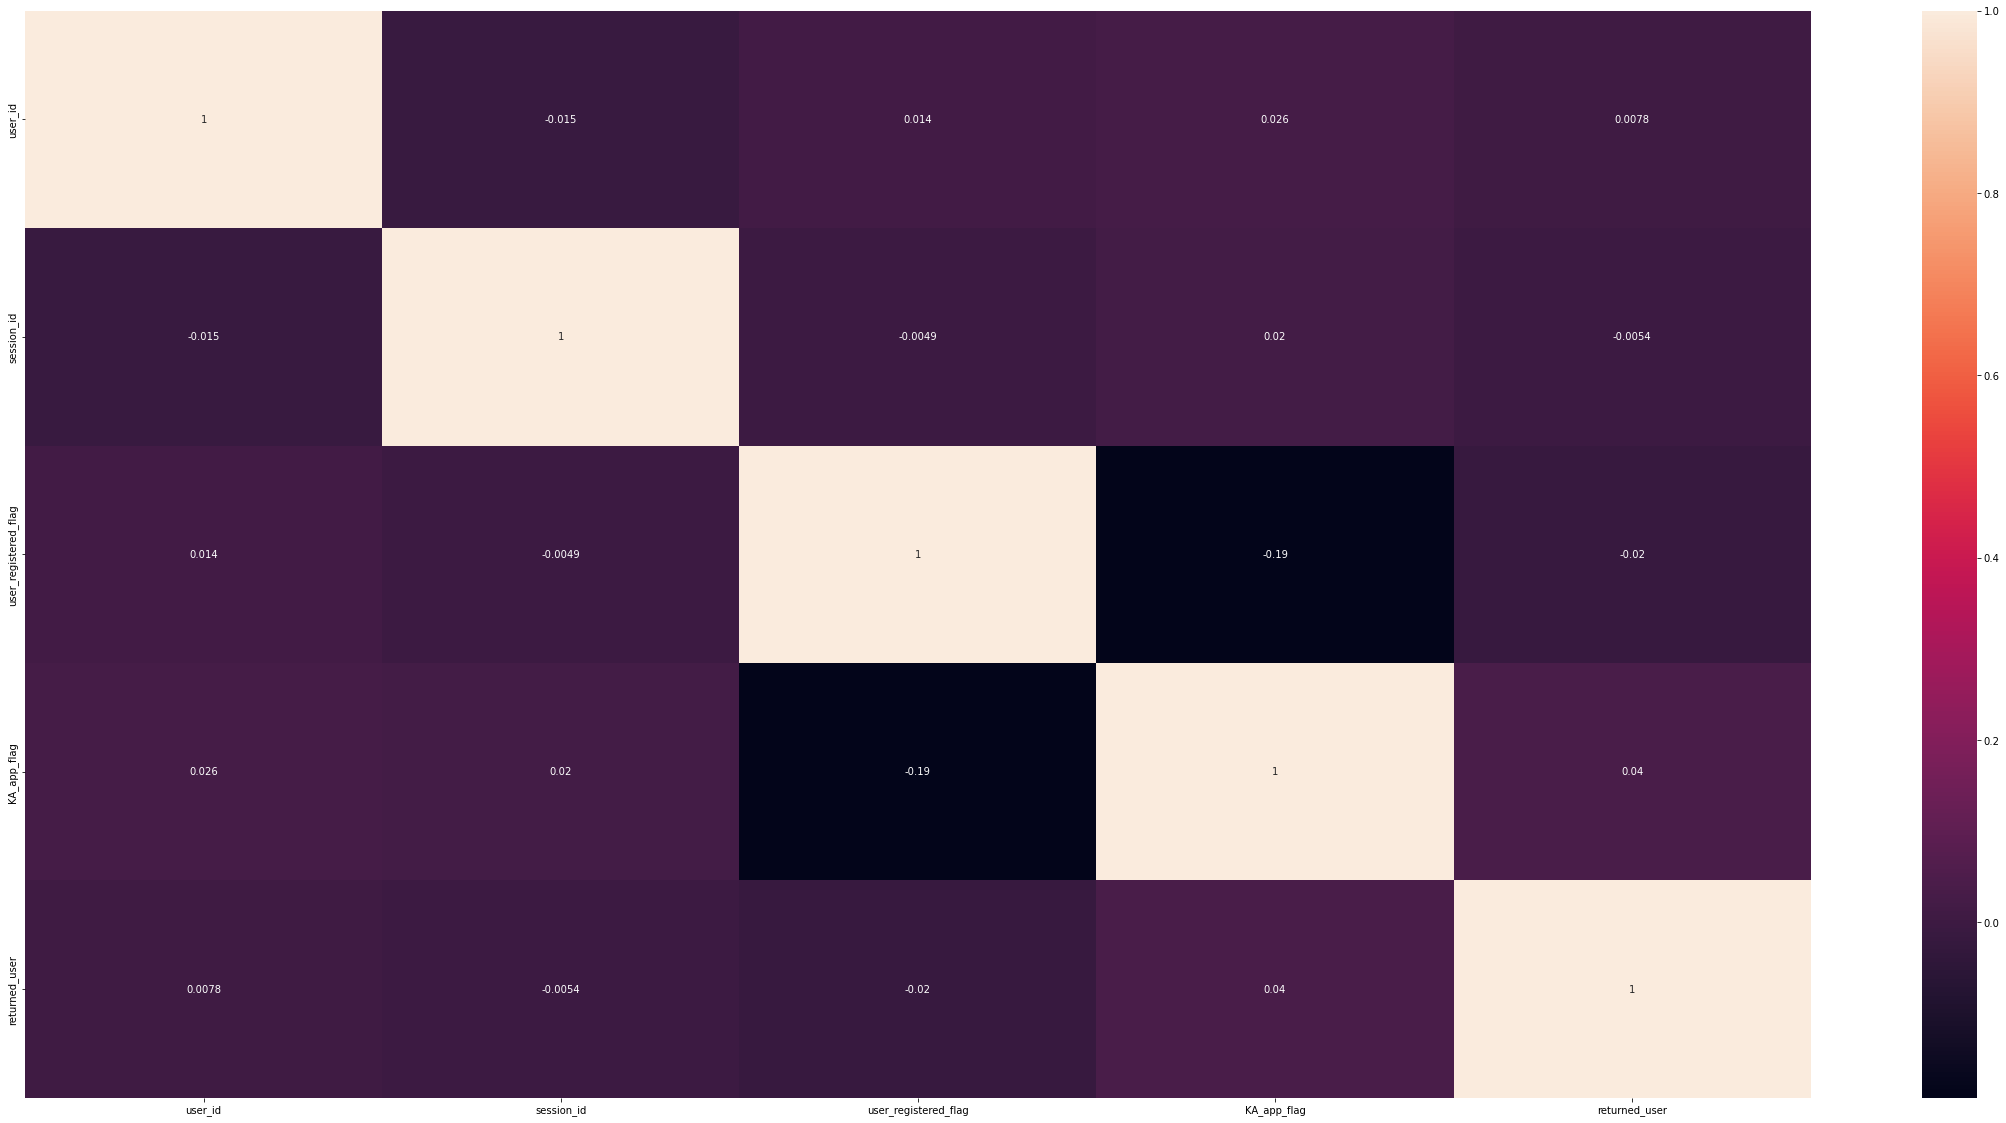

In [22]:
plt.figure(figsize=(40,20))
sns.heatmap(khan_data.corr(), annot=True)

<AxesSubplot:xlabel='returned_user', ylabel='KA_app_flag'>

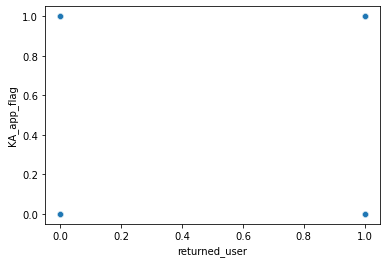

In [23]:
sns.scatterplot(x="returned_user", y="KA_app_flag", data=khan_data)

<AxesSubplot:xlabel='returned_user', ylabel='KA_app_flag'>

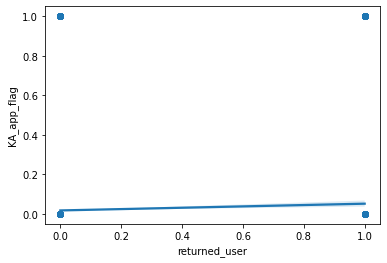

In [24]:
sns.regplot(x="returned_user", y="KA_app_flag", data=khan_data)